In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
import seaborn

In [4]:
wine_data = "Datasets/winemag-data-130k-v2.csv"

In [5]:
wine_data_df = pd.read_csv(wine_data)

In [6]:
wine_data_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [7]:
wine_data_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [8]:
reduced_wine_data_df = wine_data_df[["country", "points", "price", "variety", "province", "winery"]]

In [9]:
drop_na_df = reduced_wine_data_df.dropna()

In [10]:
drop_na_df.count()

country     120915
points      120915
price       120915
variety     120915
province    120915
winery      120915
dtype: int64

In [11]:
#groupbys for dataset
country_group = drop_na_df.groupby("country")
province_group = drop_na_df.groupby("province")
winery_group = drop_na_df.groupby("winery")
variety_group = drop_na_df.groupby("variety")
country_by_province = drop_na_df.groupby(["country", "province"])
country_by_province.mean()
country_by_variety = drop_na_df.groupby(["country", "variety"])
country_group.mean()

,points,price
country,,
Argentina,86.710330,24.510117
Armenia,87.500000,14.500000
Australia,88.595466,35.437663
Austria,90.190782,30.762772
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.659574,23.765957
Bulgaria,87.936170,14.645390
Canada,89.377953,35.712598
Chile,86.495130,20.787316


In [12]:

most_produced_varieties= drop_na_df.groupby("variety").count()["points"].sort_values(ascending = False)
most_produced_varieties_df = pd.DataFrame({"Number of Bottles":most_produced_varieties})
top_10_varieties = most_produced_varieties_df.iloc[0:10, :].index.to_list()
top_10_varieties

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [13]:
country_production = drop_na_df["country"].value_counts()

In [14]:
#Number of bottles with score greater than 80 indexed by country in descending order
sort_production_df = pd.DataFrame({"Bottles with Score >80":country_production})
#iloc df of top 10 producers for graphing
top_10_producers = sort_production_df.iloc[0:10,:]
top_10_producers

,Bottles with Score >80
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294
Germany,2120


In [15]:
#average score in descending order
avg_points_descending=country_group.mean()["points"].sort_values(ascending=False)
sort_scores = pd.DataFrame({"Average Score":avg_points_descending})
#iloc of top 10 scorers for graphing (convert to value_counts for series if needed)
top_10_scorers_df = sort_scores.iloc[0:10,:]
#list for loc searching of dataframes
top_10_scorers_list = top_10_scorers_df.index.to_list()


In [16]:
#Dataframe of top 10 producers average score (optional sort by descending)
top_10_producers_list = top_10_producers.index.to_list()
top_10_producers_scores = sort_scores.loc[top_10_producers_list,:]
top_10_producers_scores





,Average Score
country,
US,88.566387
France,88.734867
Italy,88.618186
Spain,87.290735
Portugal,88.316718
Chile,86.495130
Argentina,86.710330
Austria,90.190782
Australia,88.595466


In [17]:
#highest scoring varieties
mean_by_variety = variety_group.mean()
top_varieties = mean_by_variety.sort_values(by=["points"], ascending = False)
#most reviewed varieties
most_pop_varieties = variety_group.count().sort_values(by = ['points'], ascending = False)
top_10_varieties = most_pop_varieties.iloc[0:10,:].index.to_list()
#top 10 number of reviews by score and price
top_10_varieties_df = mean_by_variety.loc[top_10_varieties, :]
top_10_varieties_df.sort_values(by = ['points'], ascending = False)
top_10_producers_scores

,Average Score
country,
US,88.566387
France,88.734867
Italy,88.618186
Spain,87.290735
Portugal,88.316718
Chile,86.495130
Argentina,86.710330
Austria,90.190782
Australia,88.595466


In [18]:
select_countries = ['US','France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Austria', 'Australia', 'Germany']
select_df = drop_na_df[drop_na_df['country'].isin(select_countries)]

select_df.to_csv("Datasets/cleaned_countries.csv")


In [19]:
#Dataframes of top 10 varieties 
riesling_df = select_df[select_df['variety']=="Riesling"]
pinot_noir_df = select_df[select_df['variety']=="Pinot Noir"]
syrah_df = select_df[select_df['variety']=="Syrah"]
bordeaux_df = select_df[select_df['variety']=="Bordeaux-style Red Blend"]
cabernet_sauvignon_df = select_df[select_df['variety']=="Cabernet Sauvignon"]
red_blend_df = select_df[select_df['variety']=="Red Blend"]
chardonnay_df = select_df[select_df['variety']=="Chardonnay"]
sauvignon_blanc_df = select_df[select_df['variety']=="Sauvignon Blanc"]
rose_df = select_df[select_df['variety']=="Rosé"]
merlot_df = select_df[select_df['variety']=="Merlot"]
#I can set the indexes by country for these if we want to run some ttests,
#just be warned i was told that this was bad practice

In [20]:
#Mean groupbys of top 10 varieties by country
#These are means, not counts, and are necessarily means of score *and* price by country for varieties of wine
#You can get these values by grouping by country and variety, but these are simplified dataframes for easy graphing

riesling_mean = riesling_df.groupby("country").mean()
pinot_noir_mean = pinot_noir_df.groupby("country").mean()
syrah_mean = syrah_df.groupby("country").mean()
bordeaux_mean = bordeaux_df.groupby("country").mean()
cabernet_mean = cabernet_sauvignon_df.groupby("country").mean()
red_blend_mean = red_blend_df.groupby("country").mean()
chardonnay_mean = chardonnay_df.groupby("country").mean()
sauvignon_mean = sauvignon_blanc_df.groupby("country").mean()
rose_mean = rose_df.groupby("country").mean()
merlot_mean = merlot_df.groupby("country").mean()


In [21]:
us_df = select_df[select_df["country"]=="US"]
france_df = select_df[select_df["country"]=="France"]
italy_df = select_df[select_df["country"]=="Italy"]
spain_df = select_df[select_df["country"]=="Spain"]
portugal_df = select_df[select_df["country"]=="Portugal"]
chile_df = select_df[select_df["country"]=="Chile"]
argentina_df = select_df[select_df["country"]=="Argentina"]
austria_df = select_df[select_df["country"]=="Austria"]
australia_df = select_df[select_df["country"]=="Australia"]
germany_df = select_df[select_df["country"]=="Germany"]

In [23]:
ten_by_ten = pd.DataFrame({"Riesling" : riesling_mean["points"],
                           "Pinot Noir" : pinot_noir_mean["points"],
                           "Syrah": syrah_mean["points"],
                           "Bordeaux": bordeaux_mean["points"],
                           "Cabernet" : cabernet_mean["points"],
                           "Red Blend": red_blend_mean["points"],
                           "Chardonnay": chardonnay_mean["points"],
                           "Sauvignon Blanc": sauvignon_mean["points"],
                           "Rosé": rose_mean["points"],
                           "Merlot": merlot_mean["points"]})
ten_by_ten.round(0)

,Riesling,Pinot Noir,Syrah,Bordeaux,Cabernet,Red Blend,Chardonnay,Sauvignon Blanc,Rosé,Merlot
Argentina,86.0,86.0,86.0,90.0,86.0,88.0,85.0,84.0,84.0,85.0
Australia,89.0,87.0,92.0,89.0,89.0,88.0,87.0,87.0,87.0,86.0
Austria,91.0,90.0,89.0,90.0,87.0,90.0,90.0,90.0,88.0,92.0
Chile,86.0,86.0,88.0,90.0,87.0,89.0,85.0,86.0,84.0,85.0
France,91.0,90.0,90.0,88.0,85.0,88.0,89.0,88.0,87.0,87.0
Germany,90.0,89.0,NaN,NaN,NaN,87.0,89.0,NaN,89.0,NaN
Italy,88.0,87.0,89.0,90.0,89.0,89.0,88.0,87.0,86.0,90.0
Portugal,88.0,88.0,89.0,93.0,88.0,89.0,88.0,87.0,85.0,89.0
Spain,82.0,87.0,88.0,87.0,87.0,88.0,85.0,84.0,85.0,85.0
US,88.0,90.0,89.0,90.0,89.0,88.0,88.0,87.0,87.0,87.0


In [29]:
print(top_10_producers_list)


['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Austria', 'Australia', 'Germany']


In [30]:
top_10_producers_scores


,Average Score
country,
US,88.566387
France,88.734867
Italy,88.618186
Spain,87.290735
Portugal,88.316718
Chile,86.495130
Argentina,86.710330
Austria,90.190782
Australia,88.595466


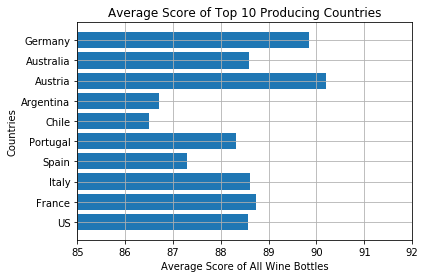

In [48]:
plt.barh(top_10_producers_list, top_10_producers_scores["Average Score"])
plt.xlim(85,92)
plt.ylabel("Countries")
plt.xlabel("Average Score of All Wine Bottles")
plt.title("Average Score of Top 10 Producing Countries")
plt.grid()
plt.savefig("Figures/Average_score.png")

In [50]:
ten_by_ten_price = pd.DataFrame({"Riesling" : riesling_mean["price"],
                           "Pinot Noir" : pinot_noir_mean["price"],
                           "Syrah": syrah_mean["price"],
                           "Bordeaux": bordeaux_mean["price"],
                           "Cabernet" : cabernet_mean["price"],
                           "Red Blend": red_blend_mean["price"],
                           "Chardonnay": chardonnay_mean["price"],
                           "Sauvignon Blanc": sauvignon_mean["price"],
                           "Rosé": rose_mean["price"],
                           "Merlot": merlot_mean["price"]})
ten_by_ten_price.round(2)

,Riesling,Pinot Noir,Syrah,Bordeaux,Cabernet,Red Blend,Chardonnay,Sauvignon Blanc,Rosé,Merlot
Argentina,15.00,22.98,17.38,41.55,19.49,34.15,17.45,14.83,13.43,17.76
Australia,22.24,32.28,105.50,67.41,35.44,29.32,25.45,17.29,19.00,20.68
Austria,37.90,37.04,13.00,36.50,31.20,34.78,35.28,29.39,15.40,35.00
Chile,16.45,19.10,28.46,51.51,20.02,39.77,15.25,14.02,12.93,12.93
France,32.39,81.85,56.40,40.90,18.04,22.29,57.28,26.63,19.48,24.50
Germany,44.26,31.38,NaN,NaN,NaN,20.12,27.60,NaN,20.91,NaN
Italy,21.00,24.50,52.85,56.50,44.04,39.69,31.79,23.22,15.67,92.76
Portugal,19.67,31.93,30.69,41.20,19.40,21.57,17.65,18.87,11.95,19.75
Spain,20.00,19.82,31.03,44.67,31.75,35.31,19.79,13.76,12.60,17.47
US,19.44,44.59,38.92,58.03,54.79,33.65,30.64,20.55,20.19,28.77


In [53]:
country_by_variety = select_df[select_df['variety'].isin(top_10_varieties)]
country_by_variety
select_df

,country,points,price,variety,province,winery
1,Portugal,87,15.0,Portuguese Red,Douro,Quinta dos Avidagos
2,US,87,14.0,Pinot Gris,Oregon,Rainstorm
3,US,87,13.0,Riesling,Michigan,St. Julian
4,US,87,65.0,Pinot Noir,Oregon,Sweet Cheeks
5,Spain,87,15.0,Tempranillo-Merlot,Northern Spain,Tandem
6,Italy,87,16.0,Frappato,Sicily & Sardinia,Terre di Giurfo
7,France,87,24.0,Gewürztraminer,Alsace,Trimbach
8,Germany,87,12.0,Gewürztraminer,Rheinhessen,Heinz Eifel
9,France,87,27.0,Pinot Gris,Alsace,Jean-Baptiste Adam
10,US,87,19.0,Cabernet Sauvignon,California,Kirkland Signature
